In [69]:
import numpy as np
from matplotlib.pylab import *
from numpy import random
from collections import OrderedDict
import os
import scipy.io
import pdb
from glob import glob

In [70]:
def figsize(width,height):
    rcParams['figure.figsize'] = (width,height)

In [71]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
font = {'size'   : 22}
matplotlib.rc('font', **font)

figsize(15, 8)

In [72]:
# Style
figsize(10, 5)
plt.rc('text', usetex=True)


## Alice in Wonderland

In [73]:
def plot(samples,mb_size, anchors=None, saveas=None):
    ss = int(np.sqrt(mb_size))
    fig = plt.figure(figsize=(ss*2, ss*2))
    gs = gridspec.GridSpec(ss, ss)
    gs.update(wspace=0.05, hspace=0.05)
    # pdb.set_trace()
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal') 
        plt.imshow(sample)
        if anchors:
            if i in anchors:
                ax.add_patch(
                    patches.Rectangle(
                        (0.1, 0.1),
                        0.5,
                        0.5,
                        fill=False      # remove background
                    )
                ) 
    if saveas:
        savefig('%s.pdf' % saveas, bbox_inches='tight')
        savefig('%s.png' % saveas, bbox_inches='tight')
    return fig



def plot_zoom(samples,n_row=1,n_col=1, ratio=2.0, rect_shape=None, edgecolor='r', saveas=None):
    fig = plt.figure(figsize=(n_row*ratio, n_col*ratio))
    gs = gridspec.GridSpec(n_row, n_col)
    gs.update(wspace=0.05, hspace=0.05)
    for i, sample in enumerate(samples):     
        if i==0:
            tt='Real cartoon'
        elif i==1:
            tt='Input edge'
        elif i==2:
            tt='Explicit ALICE'
        elif i==3:
            tt='Implicit ALICE'
        elif i==4:
            tt='CycleGAN'
        
        ax = plt.subplot(gs[i]) 
        if rect_shape:
            for rs in rect_shape:
                rect = patches.Rectangle((rs[0],rs[1]),rs[2],rs[3],linewidth=1,edgecolor=edgecolor,facecolor='none')
                # Add the patch to the Axes
                ax.add_patch(rect)
        
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title(tt)
        ax.set_aspect('equal') 
        plt.imshow(sample)
    if saveas:
        savefig('%s.pdf' % saveas, bbox_inches='tight')
        savefig('%s.png' % saveas, bbox_inches='tight')
    return fig



def load_train_data(image_path, load_size=286, fine_size=256, is_testing=False):
    img_A = imread(image_path)
    if not is_testing:
        img_A = scipy.misc.imresize(img_A, [load_size, load_size])
        h1 = int(np.ceil(np.random.uniform(1e-2, load_size-fine_size)))
        w1 = int(np.ceil(np.random.uniform(1e-2, load_size-fine_size)))
        img_A = img_A[h1:h1+fine_size, w1:w1+fine_size]

        # if np.random.random() > 0.5:
        #     img_A = np.fliplr(img_A)
    else:
        img_A = scipy.misc.imresize(img_A, [fine_size, fine_size])

    img_A = img_A/255.0
    return img_A

In [74]:
def sort_paths(fpaths, idx_num=10):
    idx_img = np.array([int(p.split('/')[-1].split('.')[0].split('_')[idx_num]) for p in fpaths])
    idx2 = np.argsort(idx_img)
    fpaths = [fpaths[i] for i in idx2]
    return fpaths

In [75]:
dstart, d_middle, dend = 91, 111, 143

# Create directory to save figs
alice_fig_dir = 'figures_alice/'
directory = alice_fig_dir
if not os.path.exists(directory):
    os.makedirs(directory)


Training dataset: cartoon and edge images

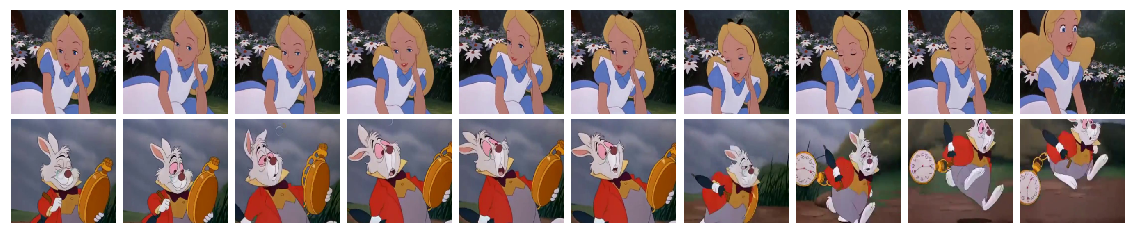

In [47]:
gt_C = sort_paths(glob('./images/256/color_256/*.*'))
data_train_C = gt_C[dstart:d_middle-2:2] + gt_C[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in data_train_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_C = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_real')

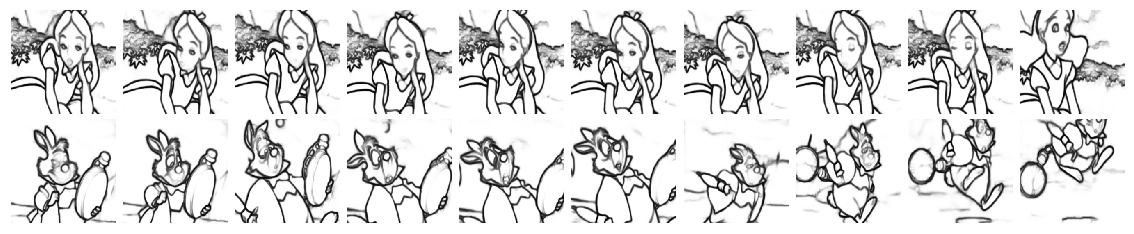

In [48]:
gt_E = sort_paths(glob('./images/256/edge_256/*fused.*'))
data_train_E = gt_E[dstart:d_middle-2:2] + gt_E[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in data_train_E]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'edges_fused_real')




After 120 Epoch

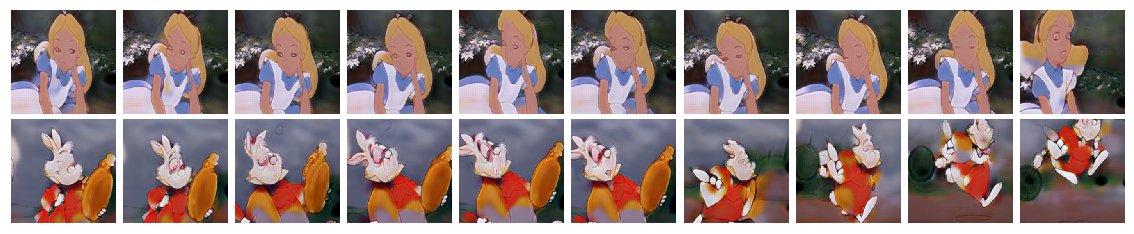

In [49]:
cyclegan_120 = sort_paths(glob('./images/cyclegan_test_dir_fused_6002/*fused.*'),11)
generated_C = cyclegan_120[dstart:d_middle-2:2] + cyclegan_120[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in generated_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_cyclegan_120')

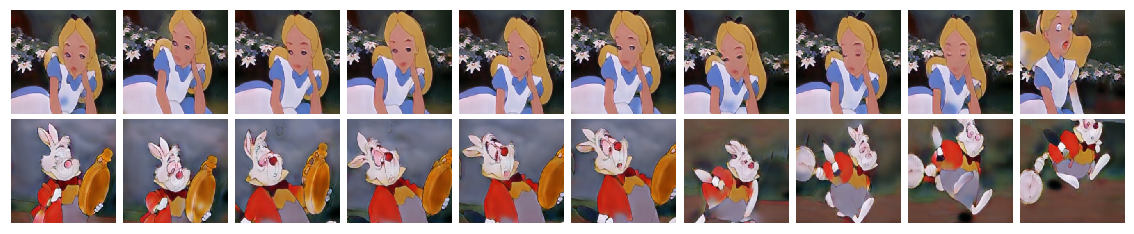

In [50]:
alice_imp_120 = sort_paths(glob('./images/alice_imp_test_dir_fused_6002/*fused.*'),11)
generated_C = alice_imp_120[dstart:d_middle-2:2] + alice_imp_120[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in generated_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_alice_imp_120')

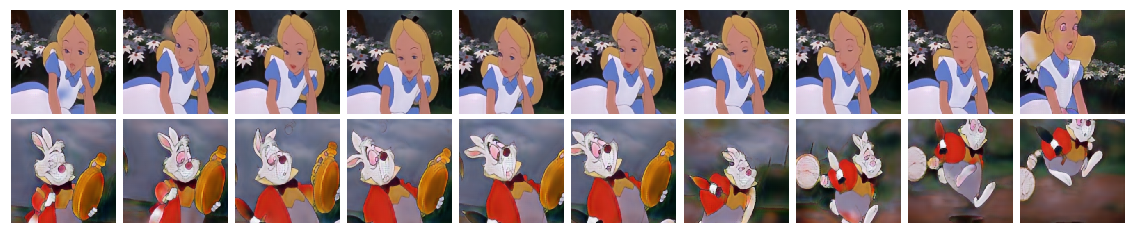

In [51]:
alice_exp_120 = sort_paths(glob('./images/alice_exp_test_dir_fused_6002/*fused.*'),11)
generated_C =  alice_exp_120[dstart:d_middle-2:2] + alice_exp_120[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in generated_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_alice_exp_120')

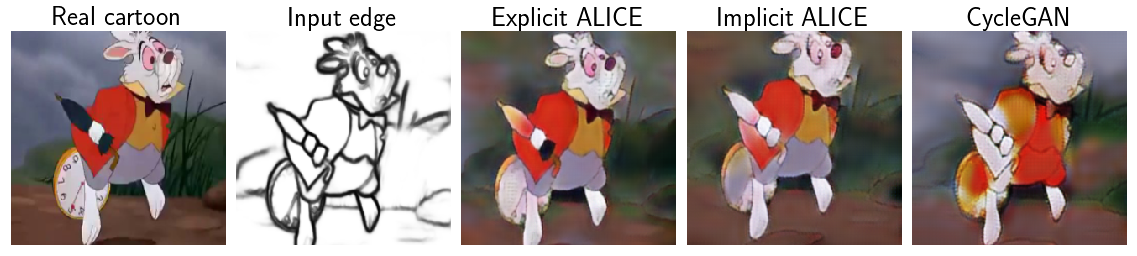

In [68]:
test_dstart, test_dend = 83, 133

dat_120 = [gt_C, gt_E, alice_exp_120, alice_imp_120, cyclegan_120]

image_list = [ d[test_dend] for d in dat_120 ]
batch_images = [load_train_data(batch_file) for batch_file in image_list]
batch_images = np.array(batch_images).astype(np.float32)
fig_zoom = plot_zoom(batch_images,n_row=1,n_col=5, ratio=20.0, saveas=None)



After 200 Epoch...

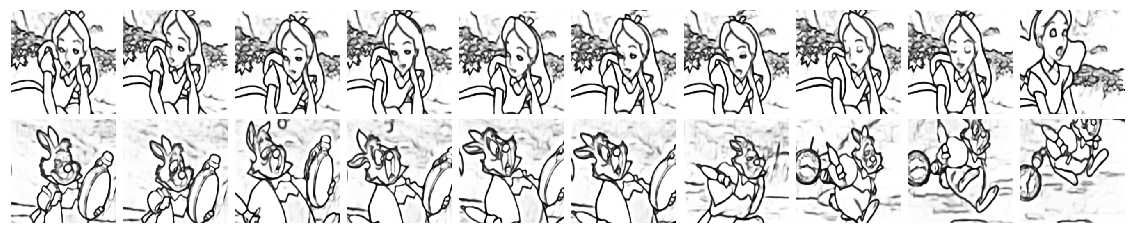

In [76]:
edge_type = '*out3.*'
gt_E = sort_paths(glob('./images/256/edge_256/'+edge_type))
data_E = gt_E[dstart:d_middle-2:2] + gt_E[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in data_E]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'edges_out3_real')

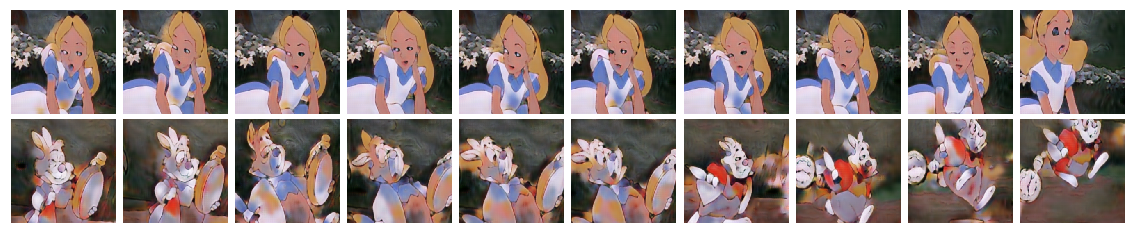

In [77]:
cyclegan_200 = sort_paths(glob('./images/cyclegan_test_dir/'+edge_type),11)
generated_C = cyclegan_200[dstart:d_middle-2:2] + cyclegan_200[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in generated_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_cyclegan_200')

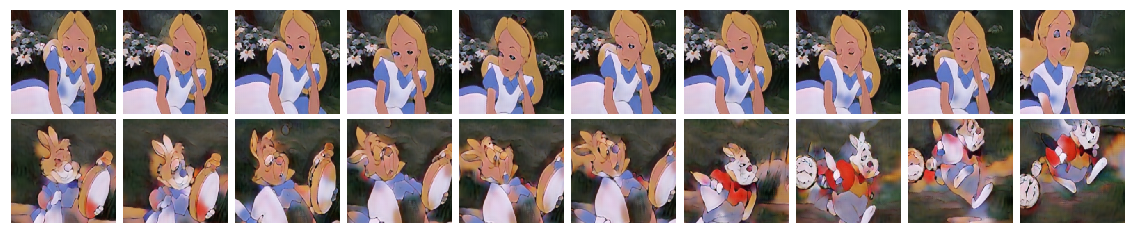

In [78]:
alice_imp_200 = sort_paths(glob('./images/alice_imp_test_dir/'+edge_type),11)
generated_C = alice_imp_200[dstart:d_middle-2:2] + alice_imp_200[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in generated_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_alice_imp_200')

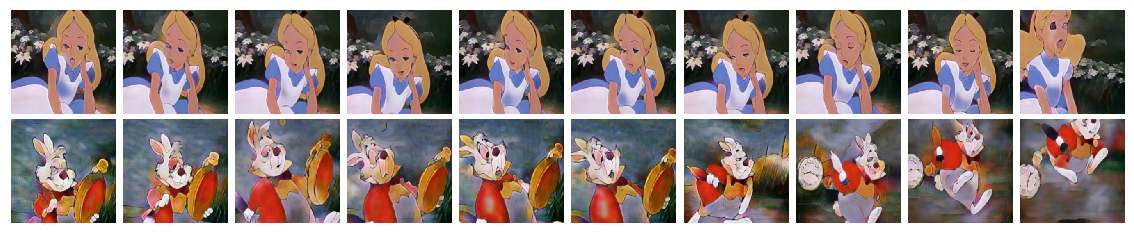

In [79]:
alice_exp_200 = sort_paths(glob('./images/alice_exp_test_dir/'+edge_type),11)
generated_C = alice_exp_200[dstart:d_middle-2:2] + alice_exp_200[d_middle:dend:3]
batch_images = [load_train_data(batch_file) for batch_file in generated_C]
batch_images = np.array(batch_images).astype(np.float32)
fig_gt_E = plot(batch_images,mb_size=100, anchors=None, saveas=alice_fig_dir+'cartoon_alice_exp_200')

Image quality comparison

In [80]:
edge_type = '*out3.*'
gt_E = sort_paths(glob('./images/256/edge_256/'+edge_type))
cyclegan_200 = sort_paths(glob('./images/cyclegan_test_dir/'+edge_type),11)
alice_imp_200 = sort_paths(glob('./images/alice_imp_test_dir/'+edge_type),11)
alice_exp_200 = sort_paths(glob('./images/alice_exp_test_dir/'+edge_type),11)

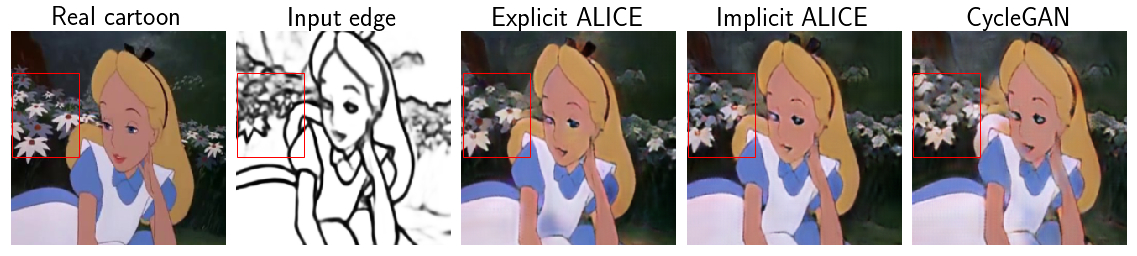

In [ ]:
test_idx = [100]
dat_200 = [gt_C, gt_E, alice_exp_200, alice_imp_200, cyclegan_200]

image_list = [ d[i] for i in test_idx for d in dat_200 ]
batch_images = [load_train_data(batch_file) for batch_file in image_list]
batch_images = np.array(batch_images).astype(np.float32)
rect_shape, edgecolor = [[1,50,80,100]], 'r'
fig_zoom = plot_zoom(batch_images,n_row=1,n_col=5, ratio=20.0, rect_shape=rect_shape, edgecolor=edgecolor, saveas=alice_fig_dir+'cartoon_cmp_'+str(test_idx[0]))

In [ ]:
test_idx = [136]

image_list = [ d[i] for i in test_idx for d in dat_200 ]
batch_images = [load_train_data(batch_file) for batch_file in image_list]
batch_images = np.array(batch_images).astype(np.float32)
rect_shape, edgecolor =[[110,20,90,70], [40,110,80,70]], 'b'
fig_zoom = plot_zoom(batch_images,n_row=1,n_col=5, ratio=20.0, rect_shape=rect_shape, edgecolor=edgecolor, saveas=alice_fig_dir+'cartoon_cmp_'+str(test_idx[0]))

In [ ]:
test_idx = [10]

image_list = [ d[i] for i in test_idx for d in dat_200 ]
batch_images = [load_train_data(batch_file) for batch_file in image_list]
batch_images = np.array(batch_images).astype(np.float32)
rect_shape, edgecolor = [[30,80,100,100]], 'y'
fig_zoom = plot_zoom(batch_images,n_row=1,n_col=5, ratio=20.0, rect_shape=rect_shape, edgecolor=edgecolor, saveas=alice_fig_dir+'cartoon_cmp_'+str(test_idx[0]))